In [1]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import rad_reader
import importlib
importlib.reload(rad_reader)
import rad_reader

SignificanceResult(statistic=np.float64(0.17623870695628713), pvalue=np.float64(0.38911783465800764))
PearsonRResult(statistic=np.float64(0.11233632104278861), pvalue=np.float64(0.5848127852566576))


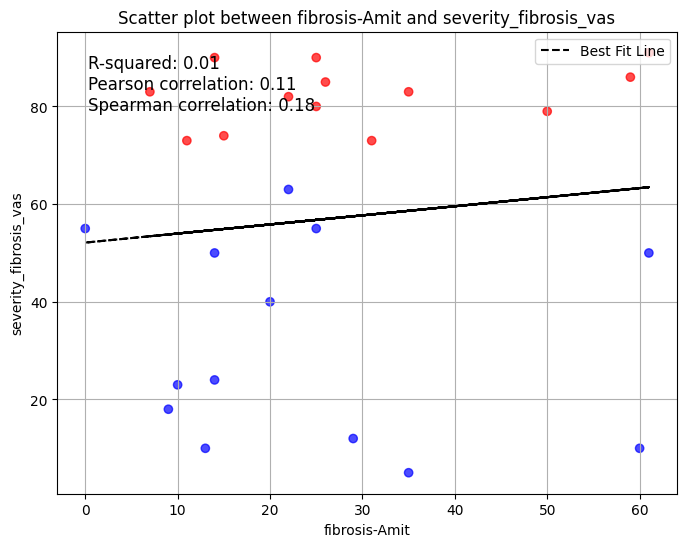

SignificanceResult(statistic=np.float64(0.39996574169236043), pvalue=np.float64(0.04291547637043777))
PearsonRResult(statistic=np.float64(0.38083587043701733), pvalue=np.float64(0.05493007859271131))


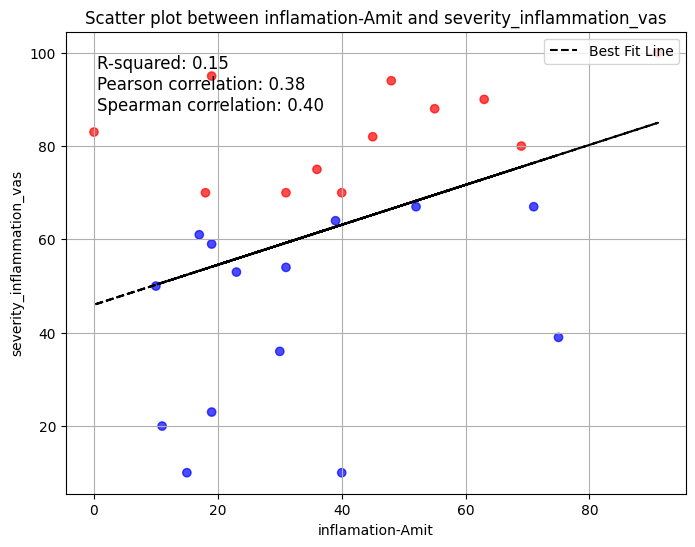

SignificanceResult(statistic=np.float64(0.1328994710361925), pvalue=np.float64(0.5174962003771058))
PearsonRResult(statistic=np.float64(0.07957843473215795), pvalue=np.float64(0.6991786206320965))


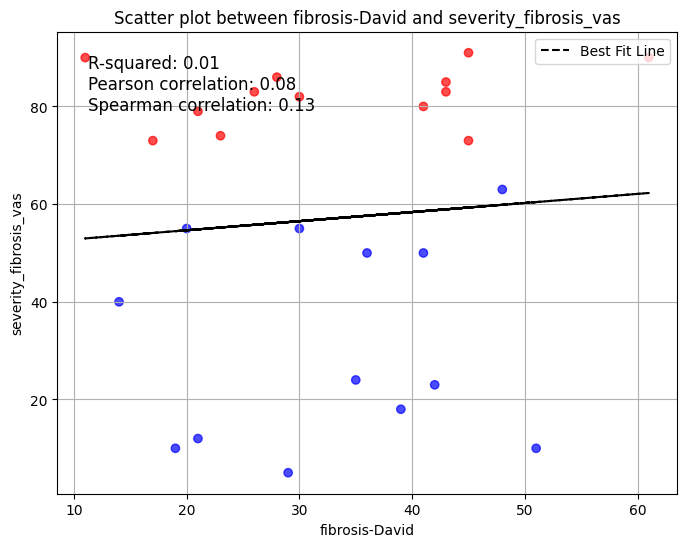

SignificanceResult(statistic=np.float64(0.4881808838643371), pvalue=np.float64(0.011399691050822764))
PearsonRResult(statistic=np.float64(0.5076832035508002), pvalue=np.float64(0.008107122780307075))


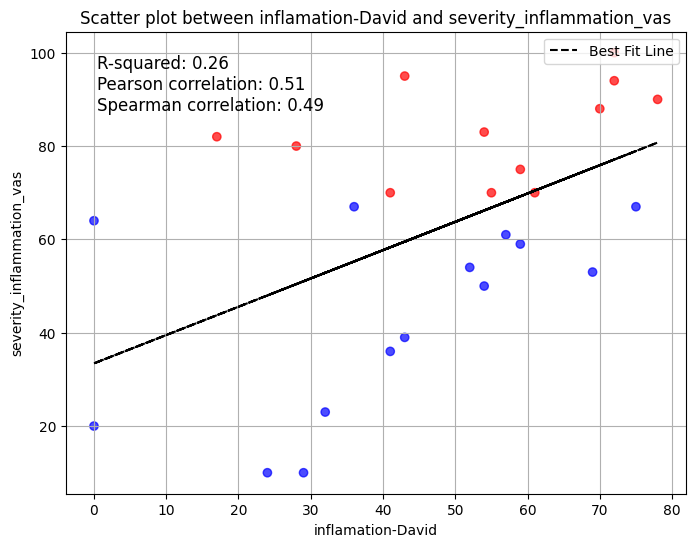

(SignificanceResult(statistic=np.float64(0.4881808838643371), pvalue=np.float64(0.011399691050822764)),
 PearsonRResult(statistic=np.float64(0.5076832035508002), pvalue=np.float64(0.008107122780307075)))

In [3]:
excel_file = r'C:\Users\chirr\OneDrive - Case Western Reserve University\MRE_Radiology-Scoring.xlsx'

sheet1 = pd.read_excel(excel_file, sheet_name='Amit-David-Combination pruned')
sheet2 = pd.read_excel(excel_file, sheet_name='MRE-Severity-Score-Sheet')

merged_df = pd.merge(sheet1, sheet2, how='inner', left_on='patient_id', right_on='alias_mrn')
merged_df.drop(["record_id","alias_mrn"],axis=1,inplace=True)

#print(merged_df)
#output_csv = 'merged_output.csv'
#merged_df.to_csv(output_csv, index=False)
pairs_fibrosis=[('fibrosis-Amit','fibrosis-David'),('fibrosis-Amit','rvas-chronic_non_inflammation_f'),(('fibrosis-David','rvas-chronic_non_inflammation_f'))]
pairs_inflammation=[('inflammation-Amit','inflammation-David'),('inflammation-Amit','rvas-inflammation'),(('inflammation-David','rvas-inflammation'))]

#results_fibrosis=pg.intraclass_corr(data=merged_df,ratings=pairs_fibrosis)
#results_inflammation=pg.intraclass_corr(data=merged_df,ratings=pairs_inflammation)

#print(results_fibrosis)
#print(results_inflammation)

#scatter_with_best_fit("fibrosis-Amit", "fibrosis-David", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("inflamation-Amit","inflamation-David",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

#scatter_with_best_fit("fibrosis-Amit", "rvas-chronic_non_inflammation_f", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("inflamation-Amit","rvas-inflammation",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

#scatter_with_best_fit("fibrosis-Amit", "fibrosis-David", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("inflamation-Amit","inflamation-David",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

scatter_with_best_fit("fibrosis-Amit", "severity_fibrosis_vas", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
scatter_with_best_fit("inflamation-Amit","severity_inflammation_vas",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

scatter_with_best_fit("fibrosis-David", "severity_fibrosis_vas", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
scatter_with_best_fit("inflamation-David","severity_inflammation_vas",merged_df,color=merged_df['Bin_sev_inf_co70'].values)

#scatter_with_best_fit("rvas-chronic_non_inflammation_f", "severity_fibrosis_vas", merged_df,color=merged_df['Bin_sev_fib_co70'].values)
#scatter_with_best_fit("rvas-inflammation","severity_inflammation_vas",merged_df,color=merged_df['Bin_sev_inf_co70'].values)


In [4]:
# Load Excel file for phase one  scoring
excel_file = r'C:\Users\chirr\OneDrive - Case Western Reserve University\MRE_Radiology-Scoring.xlsx'

sheet1 = pd.read_excel(excel_file, sheet_name='Amit-David Combination')
sheet2 = pd.read_excel(excel_file, sheet_name='MRE-Severity-Score-Sheet')


#This block is for merging phase one with the 
#merged_df = pd.merge(sheet1, sheet2, how='inner', left_on='patient_id', right_on='alias_mrn')
#merged_df.drop(["record_id","alias_mrn"],axis=1,inplace=True)
#print(merged_df.head(5))
#output_csv = 'merged_output.csv'
#merged_df.to_csv(output_csv, index=False)


pairs_fibrosis=[('fibrosis-Amit','fibrosis-David'),('fibrosis-Amit','rvas-chronic_non_inflammation_f'),(('fibrosis-David','rvas-chronic_non_inflammation_f'))]
pairs_inflammation=[('inflammation-Amit','inflammation-David'),('inflammation-Amit','rvas-inflammation'),(('inflammation-David','rvas-inflammation'))]

In [5]:
#Reshuffle Phase 2 data

csv_file = r'C:\Users\chirr\Downloads\amit_phase2_scoring.csv'

amit_phase2 = pd.read_csv(csv_file)
amit_phase2.drop(columns=['user','updated_at', amit_phase2.columns[amit_phase2.columns.str.match('Unnamed')][0]], inplace=True)

columns_order = ['scored','studyUID','fibrosis','inflamation','inflamationConfidence','fibrosisConfidence']
amit_phase2 = amit_phase2[columns_order]

# Modify column names excluding 'scored' and 'studyUID'
for col in amit_phase2.columns:
    if col not in ['scored', 'studyUID']:
        amit_phase2.rename(columns={col: f'{col}-Amit-P2'}, inplace=True)

merged_df= pd.merge(sheet1, amit_phase2, how='inner', left_on='studyUID',right_on='studyUID')

print(merged_df.head(5))


                                       studyUID  patient_id  user  fibrosis  \
0  2.25.138093792598866614038735732787542158346    349077.0   NaN         0   
1  2.25.151381364609798322676278269381385726101    349083.0   NaN        35   
2  2.25.167372640697919929902164027163864542030    349086.0   NaN        26   
3  2.25.178449996666269068405877780772401025468    349088.0   NaN         0   
4  2.25.203973463754770981792232862473688168375    349087.0   NaN        14   

   inflamation  inflamationConfidence  fibrosisConfidence  fibrosis-David  \
0            0                      0                   0              43   
1           11                      2                   3              29   
2           36                      3                   2              43   
3            0                      0                   0               0   
4           40                      4                   3              36   

   inflamation-David  inflamationConfidence-David  fibrosisCon

In [6]:
#output_csv = 'merged_phase2_output.csv'
#merged_df.to_csv(output_csv, index=False)


In [7]:
#manually remove rows with nan scores or multiple zeros
merged_ph2_pruned_file = r"D:\Image_Processing_Demo\sample_data\merged_phase2_output_pruned.csv"
merged_ph2_pruned = pd.read_csv(merged_ph2_pruned_file)
print(merged_ph2_pruned.head())

                                       studyUID  patient_id  user  fibrosis  \
0  2.25.151381364609798322676278269381385726101      349083   NaN        35   
1  2.25.167372640697919929902164027163864542030      349086   NaN        26   
2  2.25.203973463754770981792232862473688168375      349087   NaN        14   
3  2.25.216283113382784026636267261939114924832      349081   NaN        61   
4  2.25.221058046032357948728258383661711473328      349093   NaN        60   

   inflamation  inflamationConfidence  fibrosisConfidence  fibrosis-David  \
0           11                      2                   3              29   
1           36                      3                   2              43   
2           40                      4                   3              36   
3           15                      3                   5              41   
4           10                      3                   4              19   

   inflamation-David  inflamationConfidence-David  fibrosisCon

In [8]:
merged_ph2_pruned = pd.merge(merged_ph2_pruned, sheet2, how='inner', left_on='patient_id', right_on='alias_mrn')
merged_ph2_pruned.drop(["record_id",'user',"alias_mrn"], axis=1,inplace=True)




SignificanceResult(statistic=np.float64(0.49847337638678624), pvalue=np.float64(0.01316677410366584))
PearsonRResult(statistic=np.float64(0.6050972194831388), pvalue=np.float64(0.0017320733154836641))


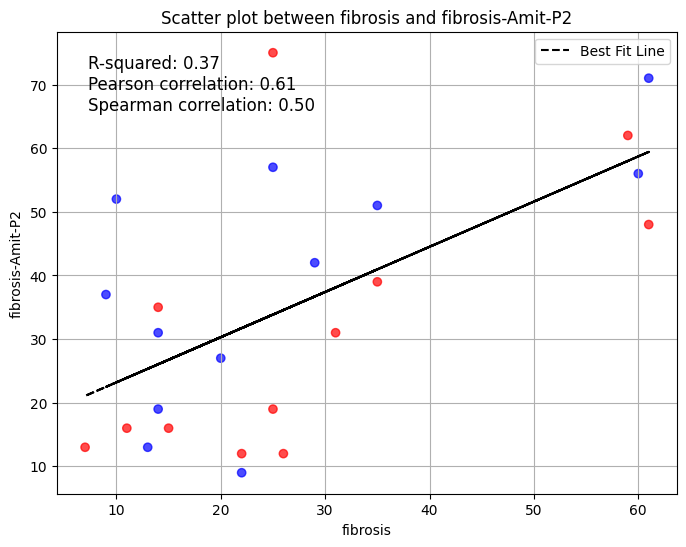

SignificanceResult(statistic=np.float64(0.1500873886013606), pvalue=np.float64(0.48392465450636046))
PearsonRResult(statistic=np.float64(0.07710073471669436), pvalue=np.float64(0.7202798352141508))


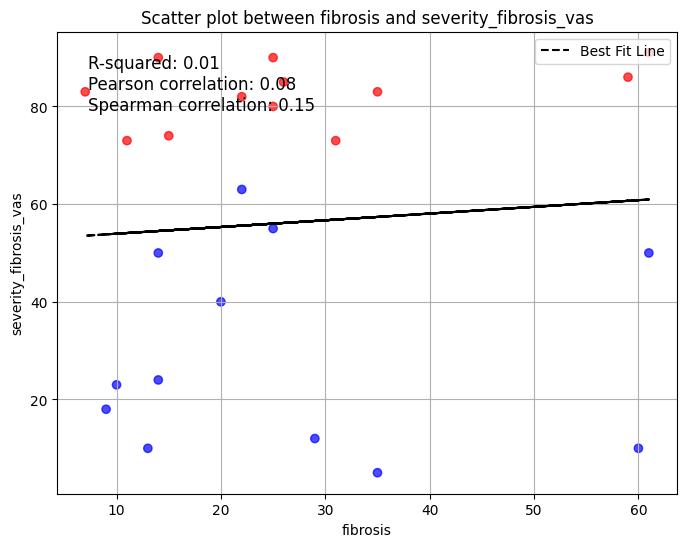

SignificanceResult(statistic=np.float64(-0.1642701525054466), pvalue=np.float64(0.4430647416337634))
PearsonRResult(statistic=np.float64(-0.18191051279295864), pvalue=np.float64(0.3949177586169049))


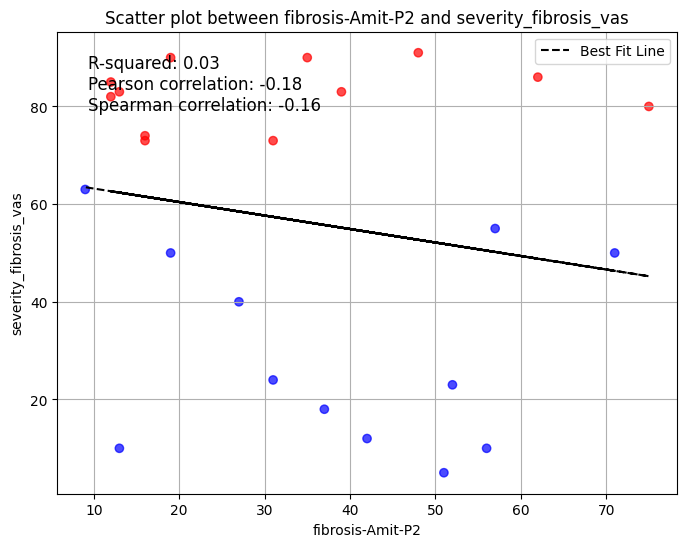

In [9]:
#pairs_fibrosis=[('fibrosis-Amit-P2','fibrosis-David'),('fibrosis','fibrosis-Amit-P2'),('fibrosis-Amit-P2','severity_fibrosis_vas'),]
#pairs_inflammation=[('inflammation-Amit-P2','inflammation-David'),('inflammation','inflammation-Amit-P2'),('inflammation-Amit-P2','severity_inflammation_vas')]
import matplotlib.pyplot as plt
import os

pairs_fibrosis=[('fibrosis','fibrosis-Amit-P2'),('fibrosis','severity_fibrosis_vas'),('fibrosis-Amit-P2','severity_fibrosis_vas')]
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

for  pairs in pairs_fibrosis:
    rad_reader.scatter_with_best_fit(pairs[0], pairs[1], merged_ph2_pruned, color=merged_ph2_pruned['Bin_sev_fib_co70'].values)

SignificanceResult(statistic=np.float64(0.490525044827316), pvalue=np.float64(0.014948394704439495))
PearsonRResult(statistic=np.float64(0.37628144900931576), pvalue=np.float64(0.06994637481861063))


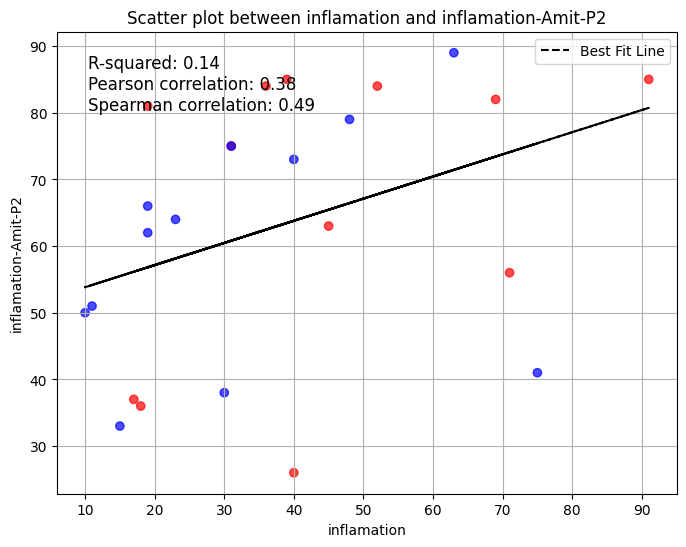

SignificanceResult(statistic=np.float64(0.48452484742807317), pvalue=np.float64(0.01642013834861545))
PearsonRResult(statistic=np.float64(0.45040264742199015), pvalue=np.float64(0.027199394285032496))


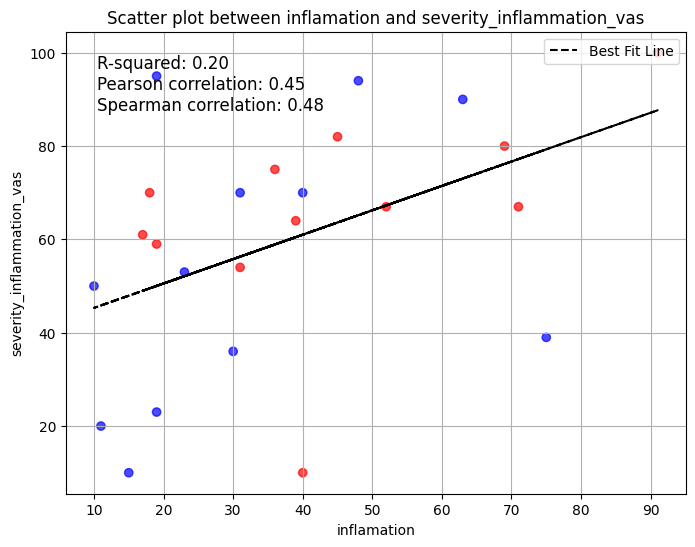

SignificanceResult(statistic=np.float64(0.5979090799515909), pvalue=np.float64(0.0020303580069672643))
PearsonRResult(statistic=np.float64(0.6573764266808945), pvalue=np.float64(0.0004822362169602533))


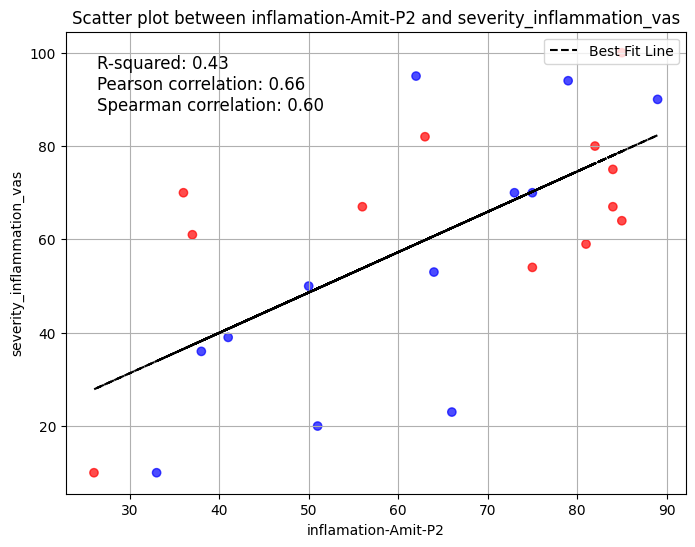

In [10]:
pairs_inflammation=[('inflamation','inflamation-Amit-P2'),('inflamation','severity_inflammation_vas'),('inflamation-Amit-P2','severity_inflammation_vas')]
for pairs in pairs_inflammation:
    rad_reader.scatter_with_best_fit(pairs[0],pairs[1], merged_ph2_pruned,color=merged_ph2_pruned['Bin_sev_fib_co70'].values)

In [17]:
importlib.reload(rad_reader)
results=rad_reader.stat_comp(before_col='inflamation',after_col='inflamation-Amit-P2',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned)
import pprint
pprint.pprint(results)

{'fisher_z_after': np.float64(0.7881793872998677),
 'fisher_z_before': np.float64(0.4852052804224866),
 'p_val_sign_rank': np.float64(9.083747863769531e-05),
 'p_val_ttest': np.float64(2.85251147786597e-05),
 'pearson_corr_after': PearsonRResult(statistic=np.float64(0.6573764266808945), pvalue=np.float64(0.0004822362169602533)),
 'pearson_corr_before': PearsonRResult(statistic=np.float64(0.45040264742199015), pvalue=np.float64(0.027199394285032496)),
 'spearman_corr_after': SignificanceResult(statistic=np.float64(0.5979090799515909), pvalue=np.float64(0.0020303580069672643)),
 'spearman_corr_before': SignificanceResult(statistic=np.float64(0.48452484742807317), pvalue=np.float64(0.01642013834861545)),
 'ttest': np.float64(-5.19882183019028),
 'wilcoxon': np.float64(24.0)}


In [ ]:
importlib.reload(rad_reader)
results=rad_reader.stat_comp(before_col='inflamation',after_col='inflamation-Amit-P2',target_col='severity_inflammation_vas',dataframe=merged_ph2_pruned)
pprint.pprint(results)